In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import fbeta_score, make_scorer,r2_score,mean_absolute_error,mean_squared_error

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston.data.shape)

(506, 13)


In [ ]:
features_names=boston.feature_names
features_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df=pd.DataFrame(boston.data,columns=features_names)
df['target']=boston.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
columns_names=df.columns
columns_names=np.array(columns_names)
print(columns_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'target']


In [ ]:
len(columns_names)


14

In [ ]:
# x=boston.data

In [ ]:
# y=boston.target

In [ ]:
type(boston.data)

numpy.ndarray

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [ ]:
# raw_dataset.dropna(inplace=True)

In [ ]:
# raw_dataset.isnull().sum()

In [ ]:
mms = MinMaxScaler()
mms.fit(df)

df=mms.transform(df)

df=pd.DataFrame(df,columns=columns_names)


df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [ ]:
# mms = MinMaxScaler()
# mms.fit(df)

# raw_dataset=mms.transform(x)

# # df=pd.DataFrame(raw_dataset,columns=column_names)
# x

In [ ]:
# y=y/np.max(y)

In [ ]:
x=df.drop(columns=['target'],axis=1)

In [ ]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
model= Sequential()

In [ ]:
model.add(Dense(1,input_dim=13,activation='linear'))

In [ ]:
model.compile(loss='mse',optimizer='sgd', metrics='mae')

In [ ]:
history=model.fit(x_train,y_train,epochs=500,verbose=1,validation_data=(x_test,y_test))# validation_split=0.2

Epoch 1/500
13/13 [==============================] - 1s 19ms/step - loss: 0.1641 - mae: 0.3239 - val_loss: 0.1531 - val_mae: 0.2883
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1554 - mae: 0.3161 - val_loss: 0.1463 - val_mae: 0.2846
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.1477 - mae: 0.3091 - val_loss: 0.1392 - val_mae: 0.2787
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 0.1405 - mae: 0.3024 - val_loss: 0.1329 - val_mae: 0.2729
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 0.1342 - mae: 0.2958 - val_loss: 0.1274 - val_mae: 0.2688
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.1282 - mae: 0.2894 - val_loss: 0.1223 - val_mae: 0.2645
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 0.1231 - mae: 0.2837 - val_loss: 0.1180 - val_mae: 0.2614
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 0.1180 - 

In [ ]:
pred=model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:

...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Text(0.5, 1.0, 'training and val losses')

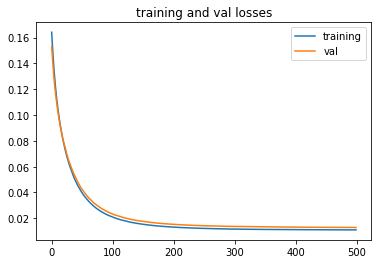

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['training','val'])
plt.title('training and val losses')

Text(0.5, 1.0, 'training and val acc')

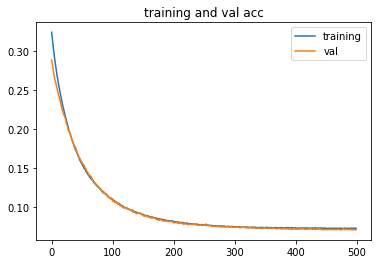

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

plt.legend(['training','val'])
plt.title('training and val acc')